In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", color_codes=True)

In [189]:
col_names = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'capital-gain',
            'capital-loss', 'hours-per-week', 'native-country',
            'income'
            ]

# data/adult.csv has been preprocessed by scripts/preproccess_csv.py
# merged adult.data and adult.test and removed extra spaces after comma
# na_values='?' is used to replace unknown values with NaN as explained in data/adult.names description
df = pd.read_csv('data/adult.csv', header=None, names=col_names, na_values='?')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [191]:
# df['age'] = df['age'].astype('int64')
# df['fnlwgt'] = df['fnlwgt'].astype('int64')

cat_vars = list(df.select_dtypes(include=['object']).columns)
num_vars = list(df.select_dtypes(include=np.number).columns)

print(f'{cat_vars=}') # cat_vars = ['workclass', 'education', ..., 'native-country', 'income']
print(f'{num_vars=}') # num_vars = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

df_categorial = df[cat_vars]
df_numerical = df[num_vars]

cat_vars=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
num_vars=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Data preparation

In [192]:
# Check for missing values
df.isna().sum()


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [193]:
# Pipeline for cleaning data
def clean_data(df):
    # Drop rows with NaN values
    # '?' values has already been replaced with NaN values during pd.read_csv()
    df = df.dropna()

    return df

df = clean_data(df)
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Exploring the data

<=50K    34014
>50K     11208
Name: income, dtype: int64


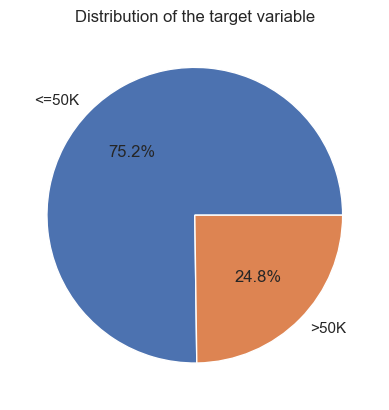

In [194]:
# Target variable's distribution
print(df['income'].value_counts())

# Pie Plot the distribution of the target variable
plt.pie(df['income'].value_counts(), labels=df['income'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of the target variable')
plt.show()

### Data Visualisation

In [305]:
# function to plot the distribution and distribution according to 'income' variable
def plot_column(df, col, target='income', bins=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    fig.suptitle(f'Histogram of {col}')

    # Histogram of the column
    if (col in cat_vars):
        sns.countplot(data=df, y=col, ax=ax1, order=df[col].value_counts().index)
        sns.countplot(data=df, y=col, hue=target, ax=ax2, order=df[col].value_counts().index)
        
    else: # col in num_vars
        sns.histplot(data=df, x=col, ax=ax1, kde=True)
        # Each column has its name to the range of the bin
        if(bins):
            sns.histplot(data=df, x=col, bins=bins, hue=target, multiple="stack", ax=ax2)
            ax2.set_xlabel(f"{col} - Divided into {bins} bins")
        else:
            sns.histplot(data=df, x=col, hue=target, multiple="stack", ax=ax2)


    
    

    plt.show()


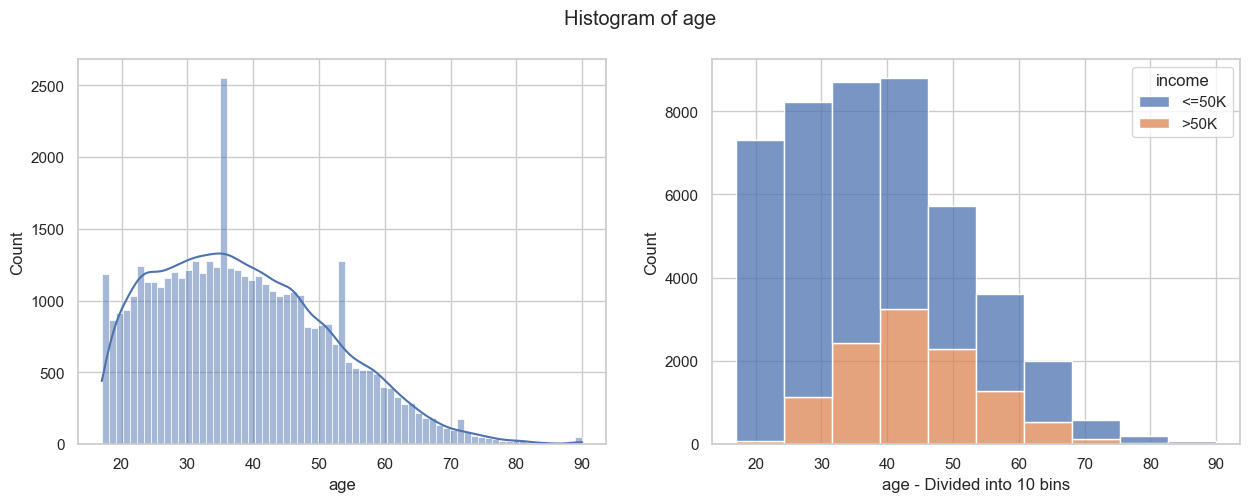

In [306]:
# Plot Age, Age vs. Income
plot_column(df, 'age', bins=10)

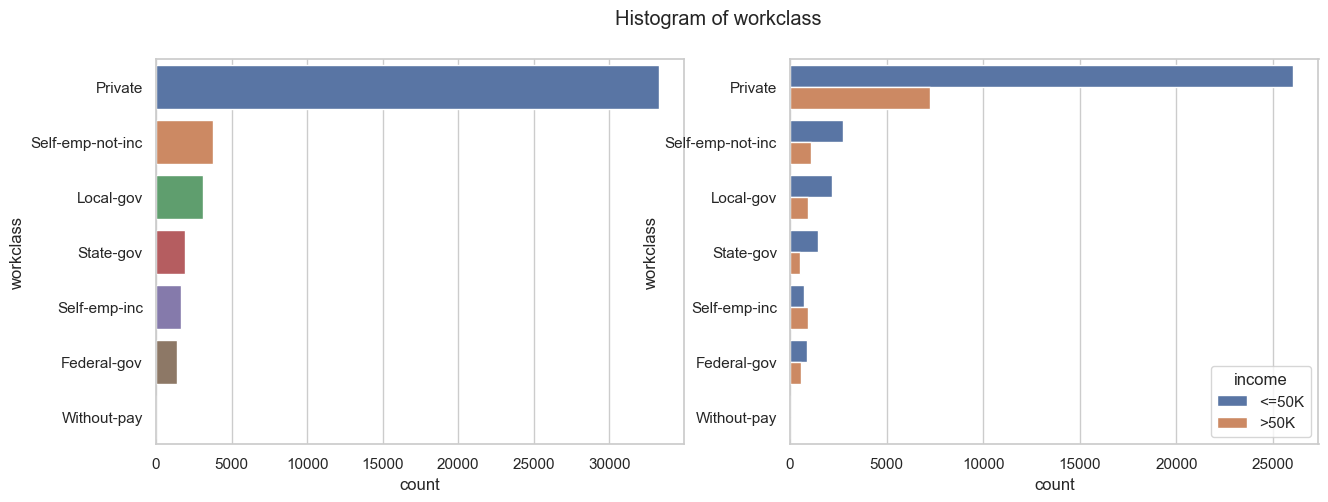

In [307]:
# Plot workclass, workclass vs. Income
plot_column(df, 'workclass')

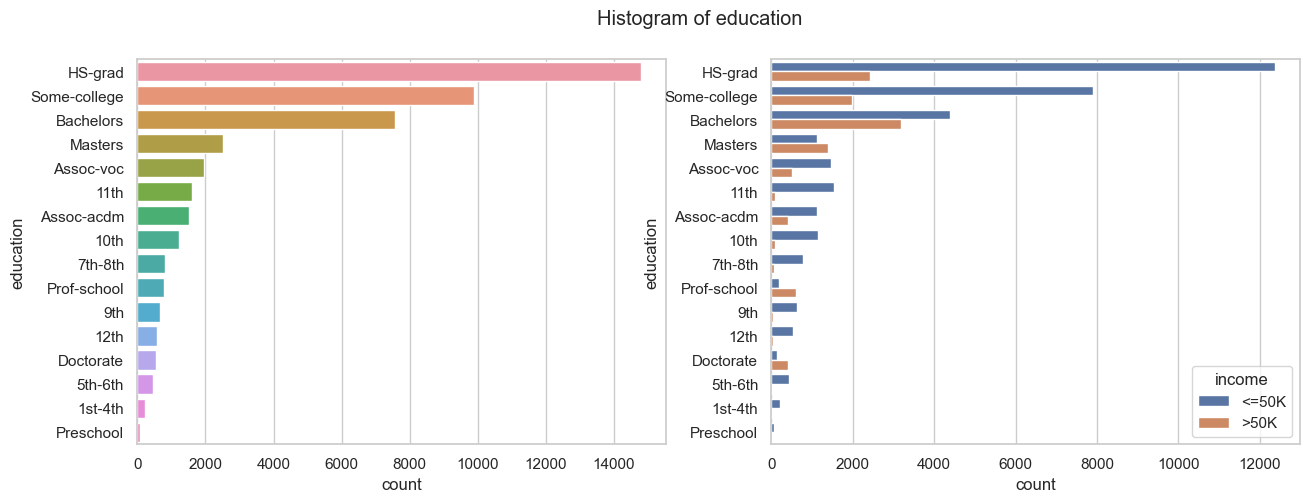

In [308]:
# Plot education, education vs. Income
plot_column(df, 'education')

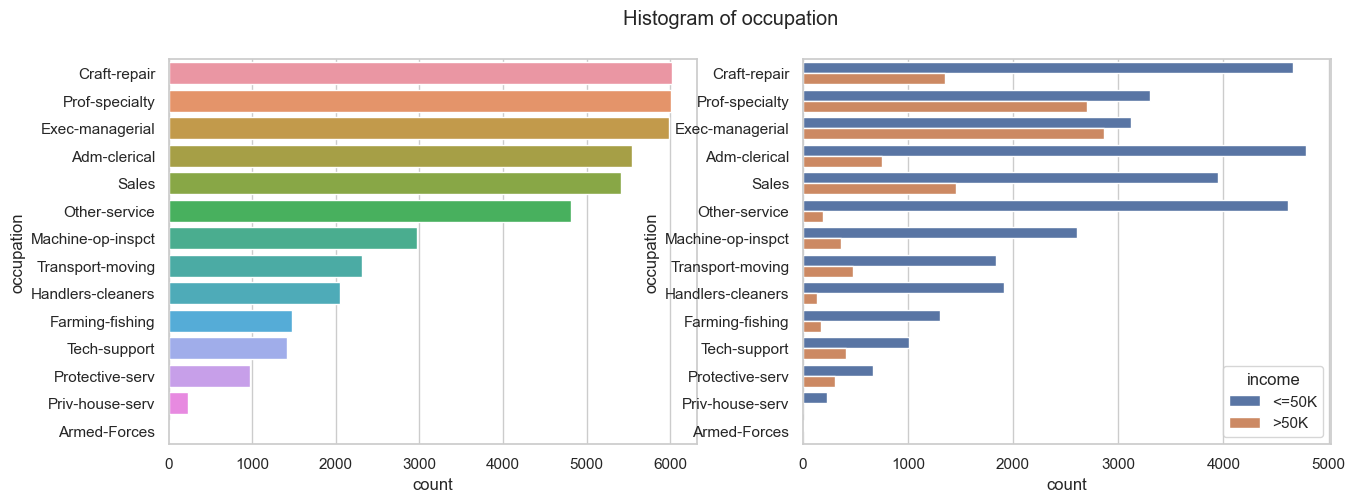

In [309]:
# Plot occupation, occupation vs. Income
plot_column(df, 'occupation')

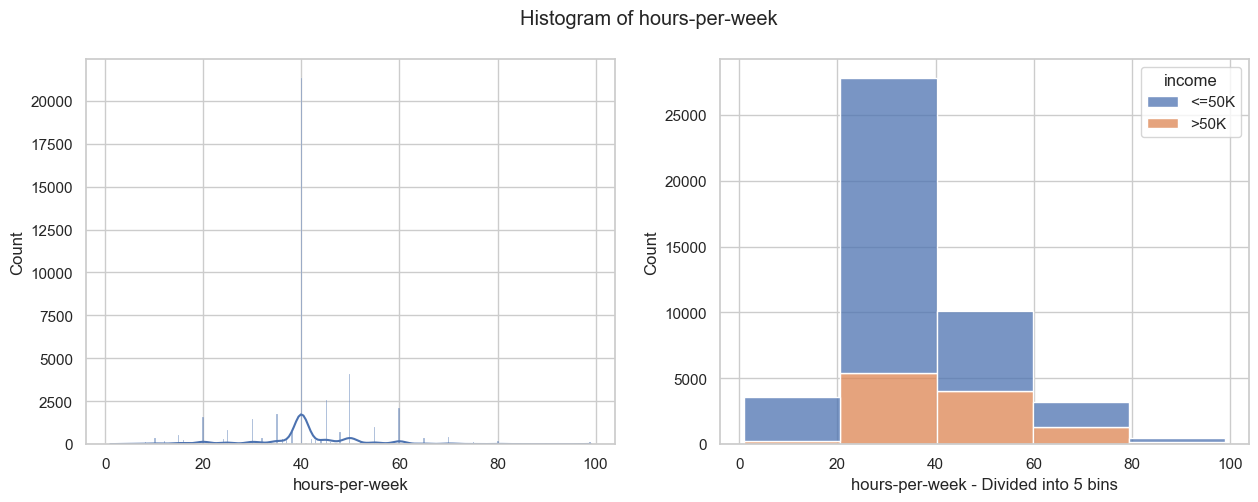

In [317]:
# Plot hours-per-week, hours-per-week vs. Income
plot_column(df, 'hours-per-week', bins=5)

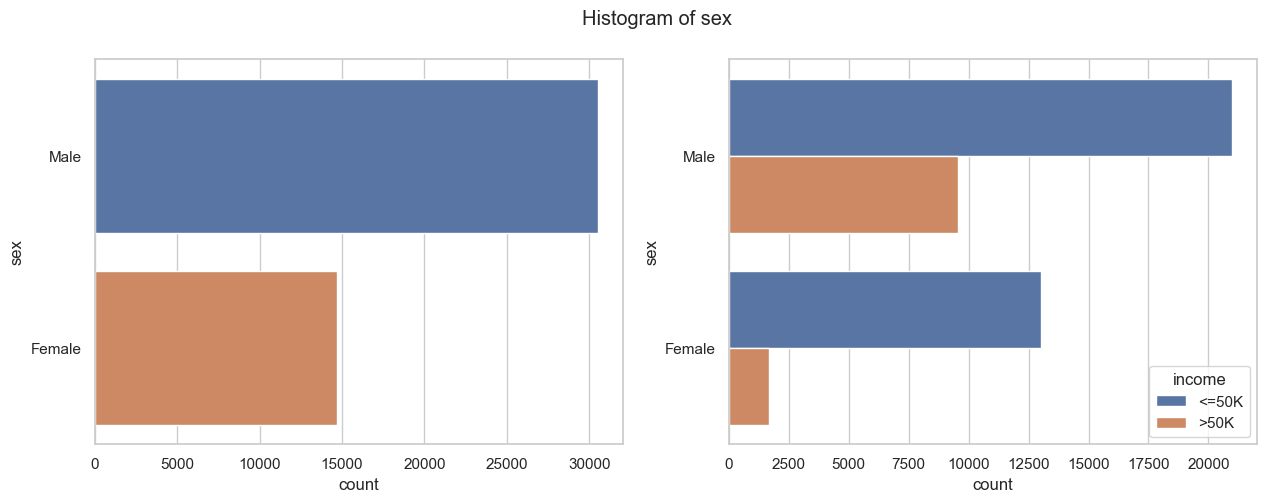

In [319]:
# Plot sex, sex vs. Income
plot_column(df, 'sex')

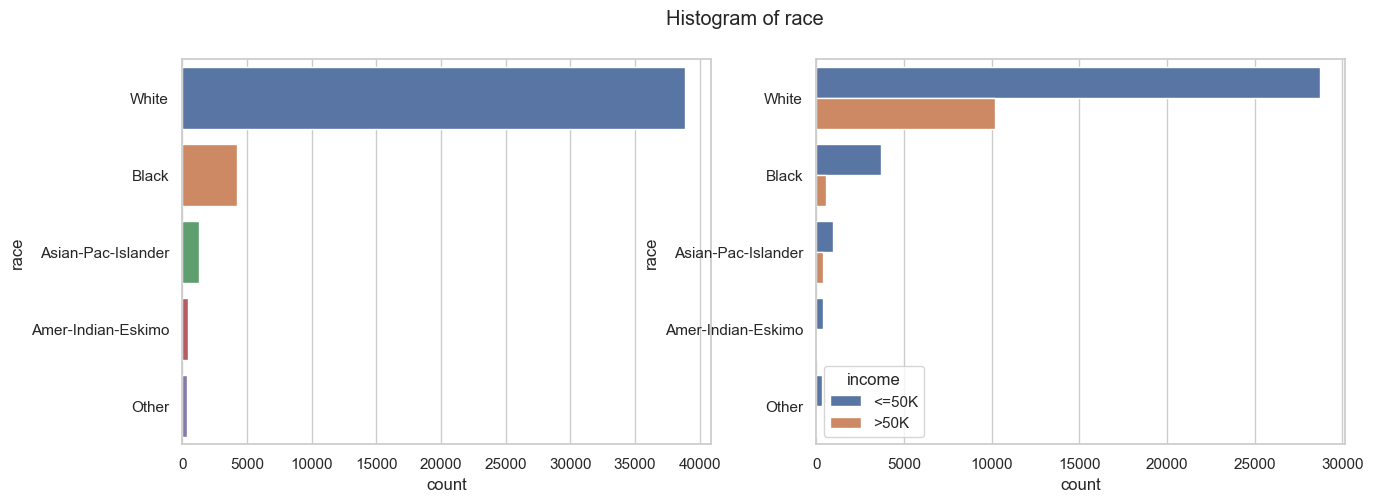

In [318]:
# Plot race vs. Income
plot_column(df, 'race')

In [322]:
# Plot native-country vs. Income
# plot_column(df[df['native-country'] != 'United-States'], 'native-country')

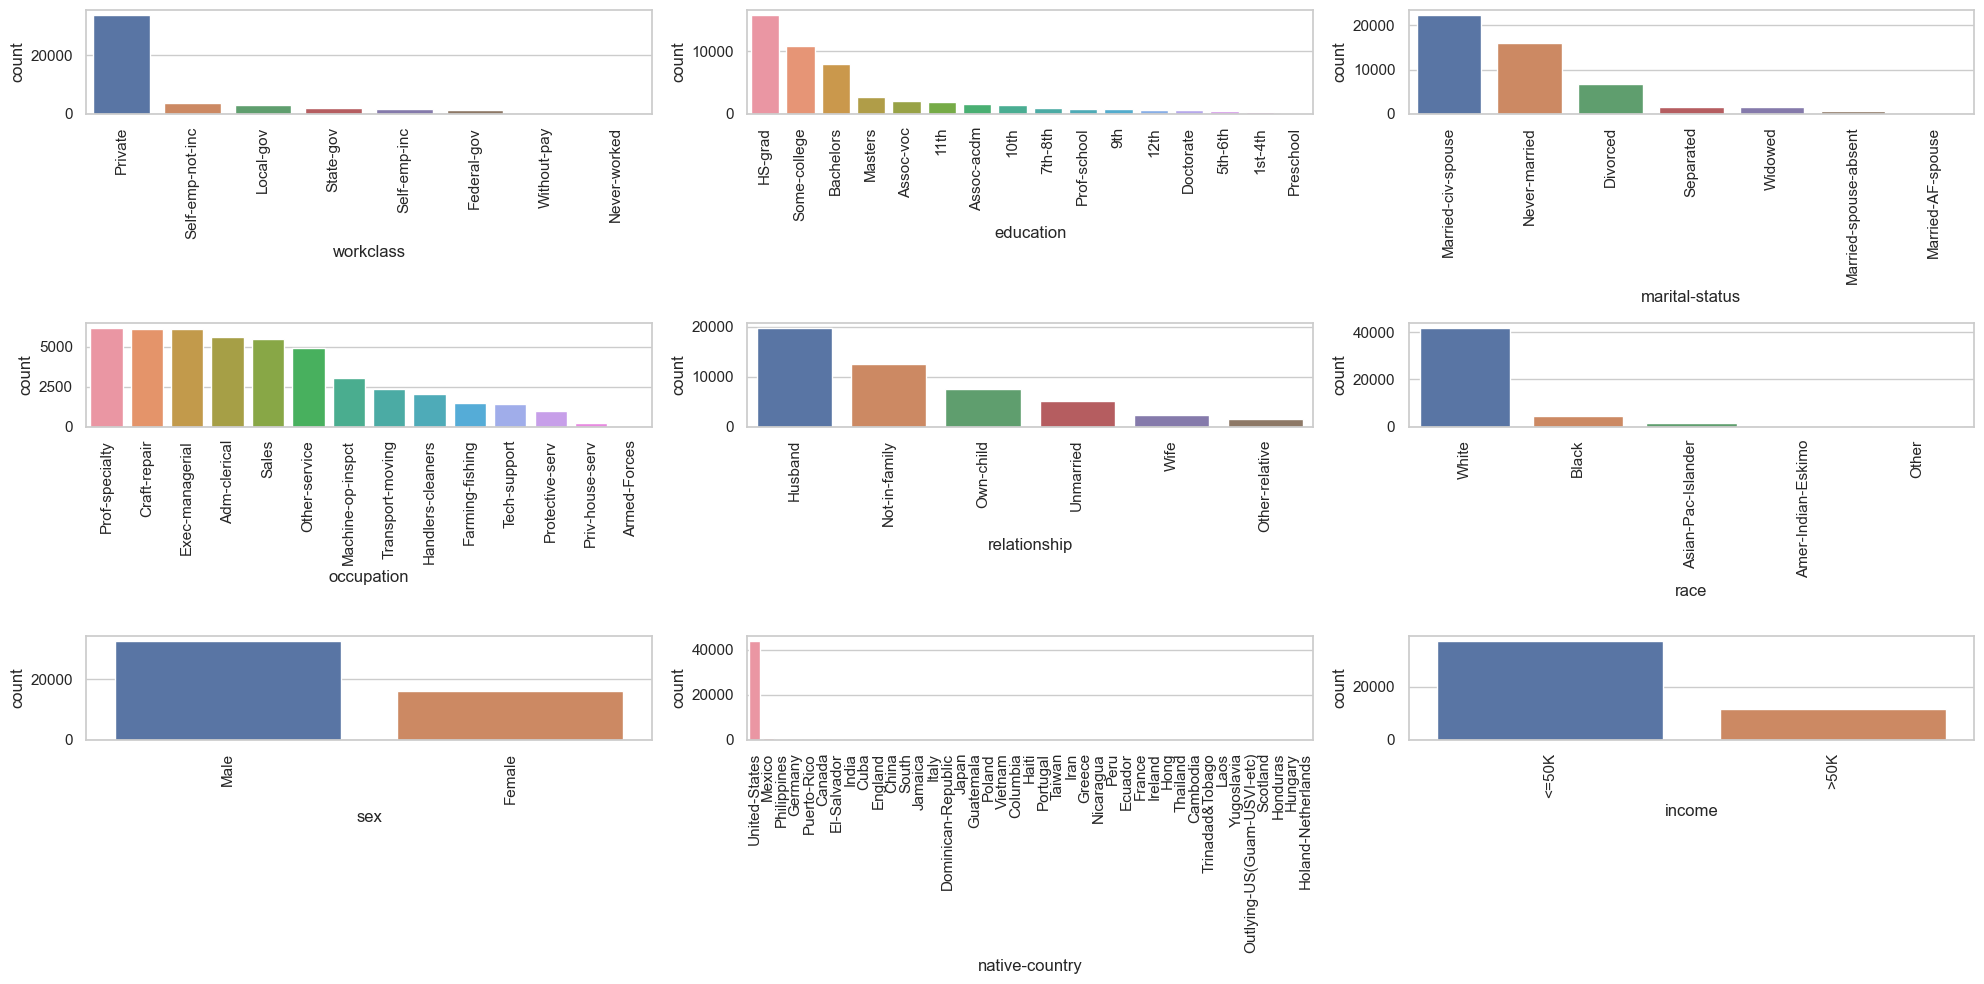

In [274]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df_categorial, ax=axs[i], order=df_categorial[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_41183/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_41183/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_41183/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_41183/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_41183/482783700.py:6: UserWarning: FixedFormatter should only

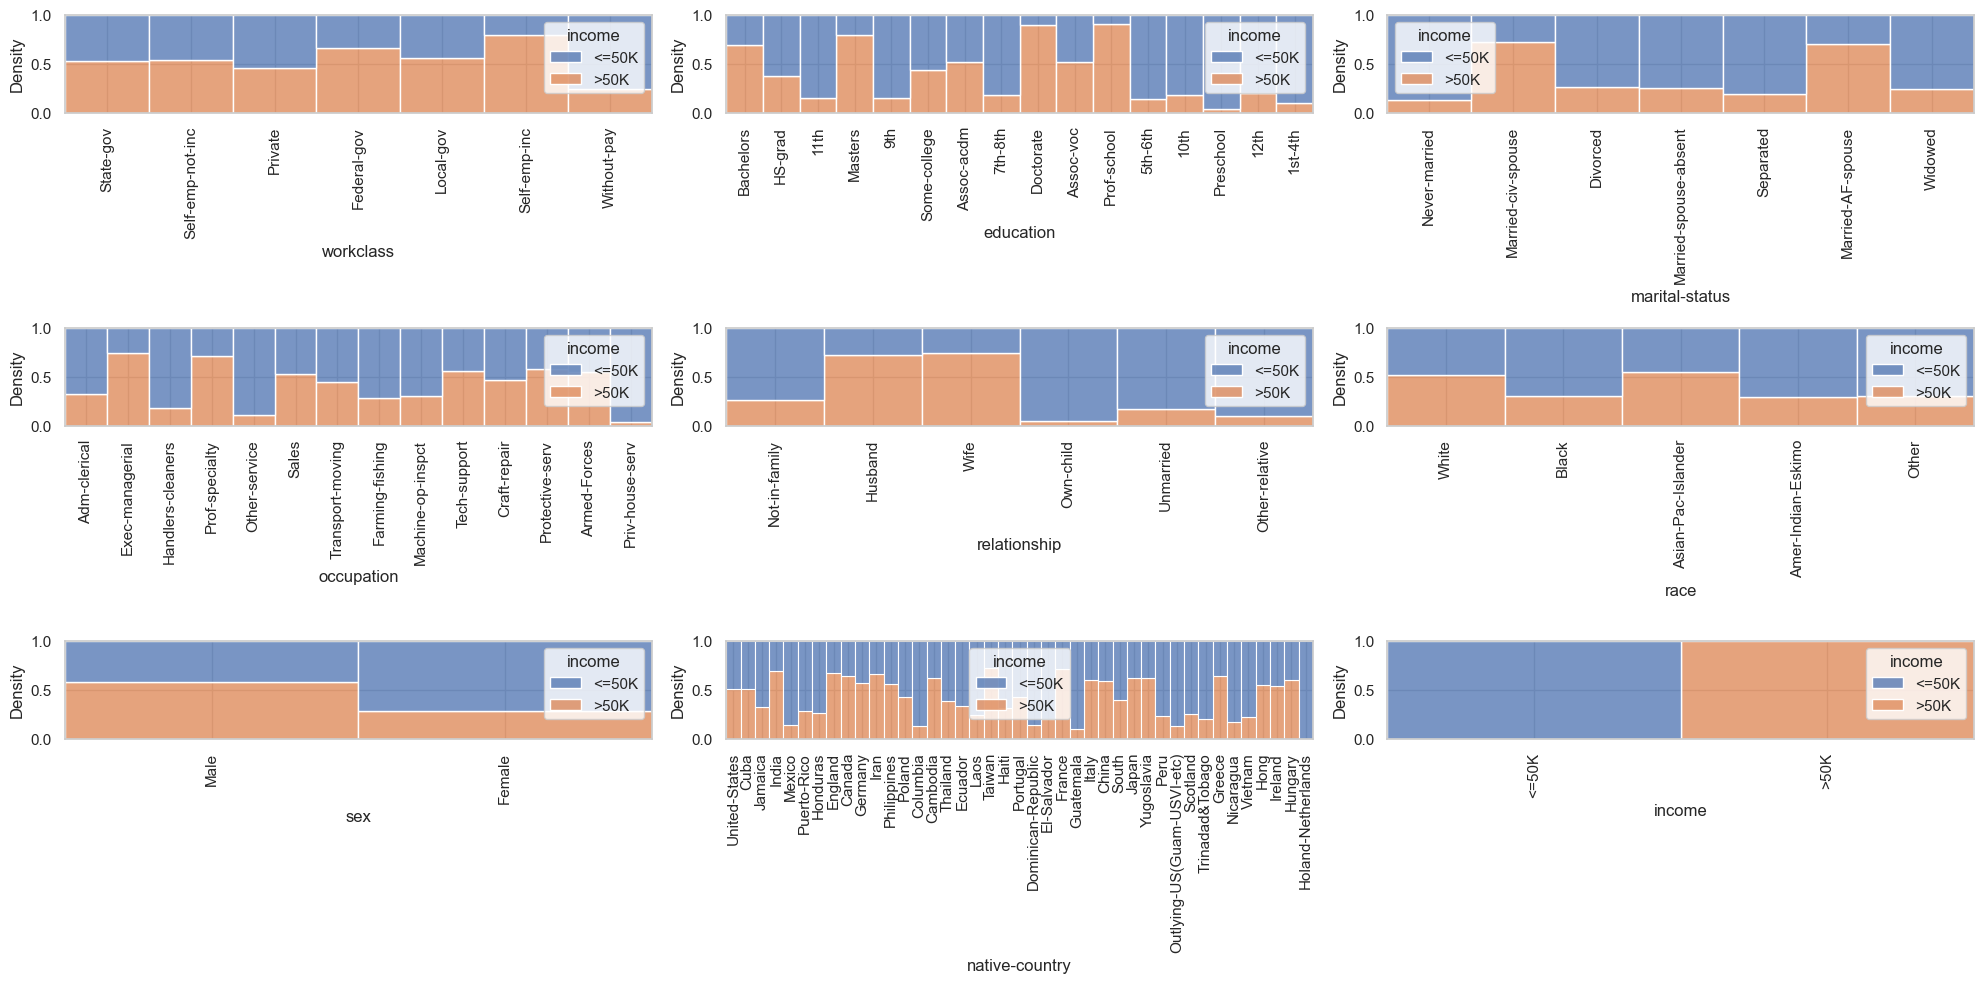

In [261]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue="income", data=df, ax=axs[i], multiple="fill", kde=False, element="bars" , fill=True, stat="density", common_norm=False, common_bins=False, discrete=(var in cat_vars))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

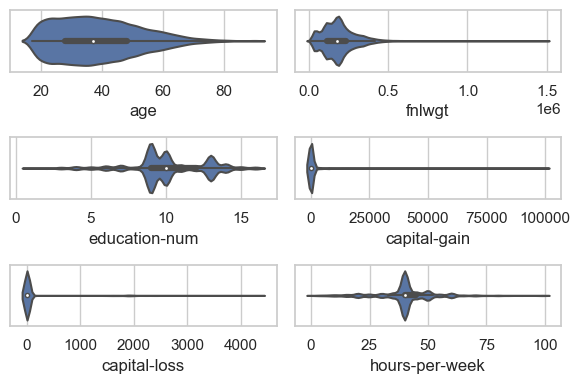

In [262]:
fig, ax = plt.subplots(3, 2, figsize=(6, 4))
axs = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df_numerical, ax=axs[i])

fig.tight_layout()

plt.show()

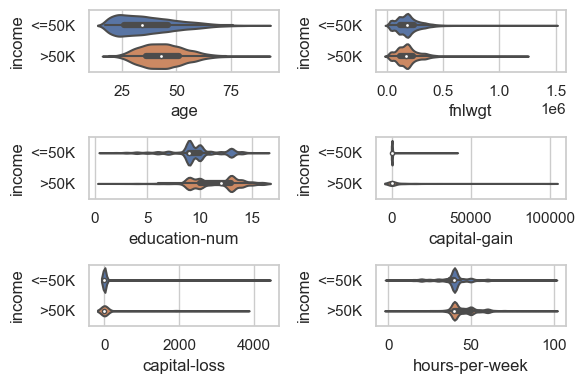

In [263]:
fig, ax = plt.subplots(3, 2, figsize=(6, 4))
axs = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y='income', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_41183/684085392.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


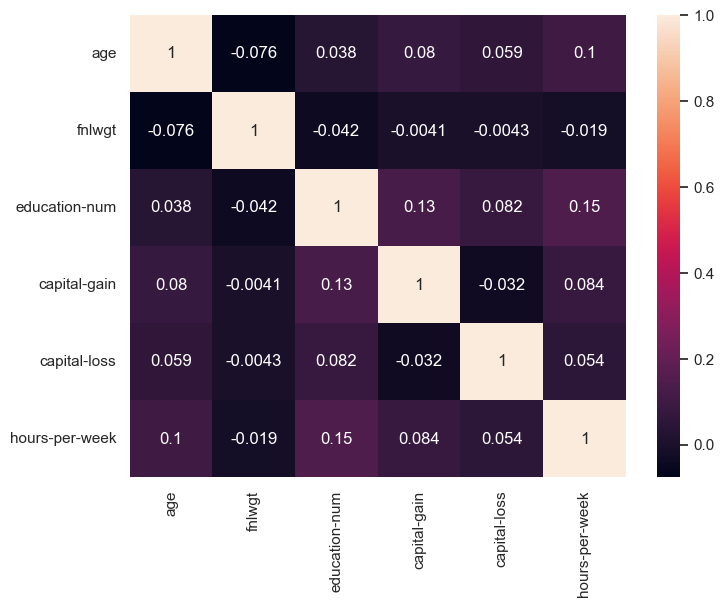

In [267]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))

corrmat = df.corr()
top_corr_features = corrmat.index

sns.heatmap(df[top_corr_features].corr(),annot=True)

plt.show()

## Data Preprocessing

In [139]:
# create a df to map education-num to education
edu_map = df[['education', 'education-num']].drop_duplicates().sort_values(by='education-num').reset_index(drop=True)


# Drop education column
df.drop('education', axis=1, inplace=True)

### Normalisation of Numerical Data

In [140]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

def normalize_col(df, columnname):
    return scaler.fit_transform(df[columnname].values.reshape(-1, 1)) # Column vector

In [141]:
# num_arr_scaled = np.concatenate([normalize_col(df, column) for column in num_vars], axis=1)
for col in num_vars:
    df[col] = normalize_col(df, col)

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04
mean,-2.325424e-17,5.192923e-17,1.655293e-16,-1.971897e-17,2.498260e-17,2.144732e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.630231e+00,-1.668365e+00,-3.571870e+00,-1.467332e-01,-2.187803e-01,-3.326124e+00
25%,-7.980149e-01,-6.848527e-01,-4.381216e-01,-1.467332e-01,-2.187803e-01,-7.812006e-02
50%,-1.171110e-01,-1.080930e-01,-4.640300e-02,-1.467332e-01,-2.187803e-01,-7.812006e-02
75%,6.394489e-01,4.561924e-01,1.128753e+00,-1.467332e-01,-2.187803e-01,3.382907e-01
max,3.892656e+00,1.231247e+01,2.303909e+00,1.317519e+01,1.053806e+01,4.835527e+00


### Encoding Categorical Data

In [142]:
# Label Encoding
for col in cat_vars:
    print(f'{col} -> {len(df[col].unique())} unique values, e.g {df[col].unique()[:3]}')

workclass -> 7 unique values, e.g ['State-gov' 'Self-emp-not-inc' 'Private']


KeyError: 'education'

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in cat_vars:
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    
    print (f" {col}: {df[col]. unique()}")

 workclass: [7 6 4 1 2 0 5 8 3]
 education: [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
 marital-status: [4 2 0 3 5 1 6]
 occupation: [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
 relationship: [1 0 5 3 4 2]
 race: [4 2 1 0 3]
 sex: [1 0]
 native-country: [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
 income: [0 1]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int64  
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  int64  
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  int64  
 6   occupation      32561 non-null  int64  
 7   relationship    32561 non-null  int64  
 8   race            32561 non-null  int64  
 9   sex             32561 non-null  int64  
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  int64  
 14  income          32561 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.7 MB


In [ ]:
# Resampling the data to have a balanced target
df['income'].value_counts()

from sklearn.utils import resample

df_majority = df[df['income'] == 0]
df_minority = df[df['income'] == 1]


In [ ]:
df_minority_upsampled = resample(df_minority,
                                    replace=True,
                                    n_samples=24720,
                                    random_state=123)

In [ ]:
df_majority

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,-0.482518,4,-0.697693,12,1.523438,4,13,1,1,1,-0.145920,-0.21666,-2.384133,36,0
32555,-1.215643,4,1.140460,15,-0.031360,4,11,1,4,1,-0.145920,-0.21666,-0.035429,39,0
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,4,0,-0.145920,-0.21666,-0.197409,39,0
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,4,0,-0.145920,-0.21666,-0.035429,39,0


## Feature Engineering

### Principal Component Analysis (PCA)

In [ ]:
# PCA
from sklearn.decomposition import PCA

df_numerical = df[num_vars] # Update df_numerical with the scaled data

variance_ratios = []
for i in range(1,df_numerical.shape[1]+1):
    pca = PCA(n_components = i)
    pca.fit(df_numerical)
    variance_ratios.append(pca.explained_variance_ratio_.round(3))

for row in variance_ratios:
    print(f'{len(row)} components: avg={round(sum(row)/len(row), 3)}')

1 components: avg=0.218
2 components: avg=0.196
3 components: avg=0.187
4 components: avg=0.18
5 components: avg=0.173
6 components: avg=0.167


In [ ]:
# best number of components based on sum(row)/len(row)
n_components = 3

best_pca = PCA(n_components=n_components)
X_pca = best_pca.fit_transform(df_numerical)

X_pca

array([[ 8.46167400e-01, -2.00697677e-01, -5.09771513e-01],
       [-9.71953531e-02, -9.03884322e-01, -1.15644254e+00],
       [-4.35844113e-01,  1.01773579e-01, -4.08319129e-02],
       ...,
       [ 2.53291930e-01, -7.40773999e-01, -9.20671824e-01],
       [-1.68608074e+00,  2.23264262e-01, -1.44766023e-04],
       [ 6.57837230e-01,  1.17679386e+00, -7.41226231e-01]])

In [ ]:
# update df with new X_pca values

df_pca = pd.DataFrame(X_pca, columns=['pc'+str(i) for i in range(1, n_components+1)]) # pc1, pc2, pc3

df = pd.concat(df, df_pca, axis=1)

df.head()

/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_52760/1862724657.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat(df, df_pca, axis=1)


TypeError: concat() got multiple values for argument 'axis'

# Train models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Import SMOT from sklearn

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Sample data to have equal number of postive and
# x_train, y_train = SMOTE().fit_sample(x_train, y_train) 


### Decision Trees

In [ ]:
# Grid search to find best hyperparameters

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
                          param_grid=params_dt,
                            scoring='accuracy',
                            cv=10,
)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_

print('Best hyperparameters:\n', best_hyperparams)


Best hyperparameters:
 {'max_depth': 6, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier(random_state=123
                            , max_depth=best_hyperparams['max_depth']
                            , min_samples_leaf=best_hyperparams['min_samples_leaf']
                            , max_features=best_hyperparams['max_features']
                        )
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


accuracy_score(y_test, y_pred)

print(f'Accuracy Score = {accuracy_score(y_test, y_pred) * 100:.2f}%')


Accuracy Score = 82.90%


### Random Forest

In [ ]:
# Random Forest implementation

from sklearn.ensemble import RandomForestClassifier

# params_rf = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 5, 7],
#     'max_features': [0.2, 0.5, 0.8]
# }

# # Instantiate a 10-fold CV grid search object 'grid_dt'
# grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
#                        param_grid=params_rf,
#                        scoring='accuracy',
#                        cv=10,
#                        n_jobs=-1,
#                        verbose=10
#                        )

# # Fit 'grid_rf' to the training data
# grid_rf.fit(X_train, y_train)

# # Extract best hyperparameters from 'grid_rf'
# best_hyperparams = grid_rf.best_params_

# print('Best hyperparameters:\n', best_hyperparams)
best_hyperparams = {'max_depth': 7, 'max_features': 0.8, 'n_estimators': 300}

In [ ]:

rf = RandomForestClassifier(random_state=123,
                            n_estimators=best_hyperparams['n_estimators'],
                            max_depth=best_hyperparams['max_depth'],
                            max_features=best_hyperparams['max_features']
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


accuracy_score(y_test, y_pred)

print(f'Accuracy Score = {accuracy_score(y_test, y_pred) * 100:.2f}%')

Accuracy Score = 85.48%
